In [41]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [42]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('mice')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [43]:
# import pycaret anomaly and init setup
from pycaret.anomaly import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1080, 82)"
2,Transformed data shape,"(1080, 1168)"
3,Numeric features,77
4,Categorical features,5
5,Rows with missing values,48.9%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [44]:
# import AnomalyExperiment and init the class
from pycaret.anomaly import AnomalyExperiment
exp = AnomalyExperiment()

In [45]:
# check the type of exp
type(exp)

pycaret.anomaly.oop.AnomalyExperiment

In [46]:
# init setup on exp
exp.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1080, 82)"
2,Transformed data shape,"(1080, 1168)"
3,Numeric features,77
4,Categorical features,5
5,Rows with missing values,48.9%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [47]:
# train iforest model
iforest = create_model('iforest')
iforest

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [48]:
# to check all the available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [49]:
iforest_anomalies = assign_model(iforest)
iforest_anomalies

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Anomaly,Anomaly_Score
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,0,-0.015795
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m,0,-0.016963
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622058,0.209011,0.175722,2.283337,0.230247,...,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m,0,-0.016017
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m,0,-0.029976
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718678,0.213106,0.173627,2.134014,0.192158,...,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m,0,-0.031542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s,0,-0.014019
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s,0,-0.013914
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s,1,0.012883
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s,1,0.000956


In [50]:
# tsne plot anomalies
plot_model(iforest, plot = 'tsne')

In [51]:
evaluate_model(iforest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [52]:
# predict on test set
iforest_pred = predict_model(iforest, data=data)
iforest_pred

,MouseID_309_1,MouseID_309_2,MouseID_309_3,MouseID_309_4,MouseID_309_5,MouseID_309_6,MouseID_309_7,MouseID_309_8,MouseID_309_9,MouseID_309_10,...,class_c-CS-m,class_c-SC-m,class_c-CS-s,class_c-SC-s,class_t-CS-m,class_t-SC-m,class_t-CS-s,class_t-SC-s,Anomaly,Anomaly_Score
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.015795
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.016963
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.016017
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.029976
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.031542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.014019
1076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.013914
1077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.012883
1078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.000956


In [53]:
# save pipeline
save_model(iforest, 'iforest_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['DYRK1A_N', 'ITSN1_N', 'BDNF_N',
                                              'NR1_N', 'NR2A_N', 'pAKT_N',
                                              'pBRAF_N', 'pCAMKII_N', 'pCREB_N',
                                              'pELK_N', 'pERK_N', 'pJNK_N',
                                              'PKCA_N', 'pMEK_N', 'pNR1_N',
                                              'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
                                              'pRSK_N', 'AKT_N', 'BRAF_N',
                                              'CAMKII_N', 'CREB_N', 'ELK_N',
                                              'ERK_N', 'GSK3B_N', 'JNK_N',
                                              'ME...
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['MouseID', 'class'],
                                     transformer=O

In [54]:
# load pipeline
loaded_iforest_pipeline = load_model('iforest_pipeline')
loaded_iforest_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/rx/lm_kfng95w9_1rxj88cthphm0000gq/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['DYRK1A_N', 'ITSN1_N', 'BDNF_N',
                                             'NR1_N', 'NR2A_N', 'pAKT_N',
                                             'pBRAF_N', 'pCAMKII_N', 'pCREB_N',
                                             'pELK_N', 'pERK_N', 'pJNK_N',
                                             'PKCA_N', 'pMEK_N', 'pNR1_N',
                                             'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
                                             'pRSK_N', 'AKT_N', 'BRAF_N',
                                             'C...
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['MouseID', 'class'],
                                    transformer=OneHotEncoder(cols=['MouseID',
                                                                    'class'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0))])

In [55]:
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1080, 82)"
2,Transformed data shape,"(1080, 1168)"
3,Numeric features,77
4,Categorical features,5
5,Rows with missing values,48.9%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [56]:
# check all available config
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

In [57]:
# lets access X_train_transformed
get_config('X_train_transformed')

,MouseID_309_1,MouseID_309_2,MouseID_309_3,MouseID_309_4,MouseID_309_5,MouseID_309_6,MouseID_309_7,MouseID_309_8,MouseID_309_9,MouseID_309_10,...,Treatment,Behavior,class_c-CS-m,class_c-SC-m,class_c-CS-s,class_c-SC-s,class_t-CS-m,class_t-SC-m,class_t-CS-s,class_t-SC-s
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [59]:
# init setup with bin_numeric_feature

s = setup(data, session_id = 123,
          bin_numeric_features=['pCFOS_N'])

,Description,Value
0,Session id,123
1,Original data shape,"(1080, 82)"
2,Transformed data shape,"(1080, 1168)"
3,Numeric features,77
4,Categorical features,5
5,Rows with missing values,48.9%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


<Axes: >

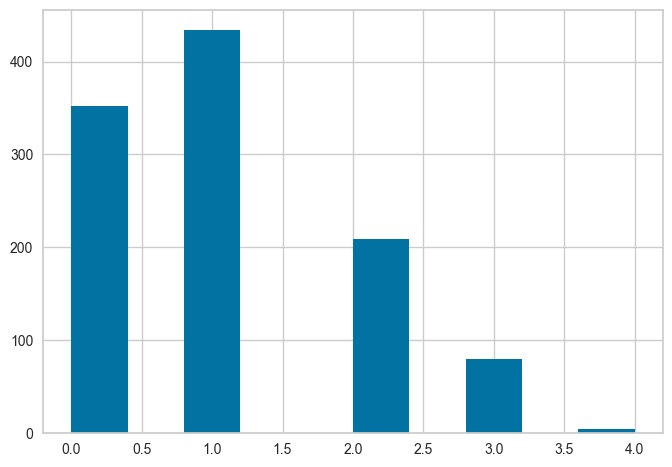

In [60]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['pCFOS_N'].hist()

<Axes: >

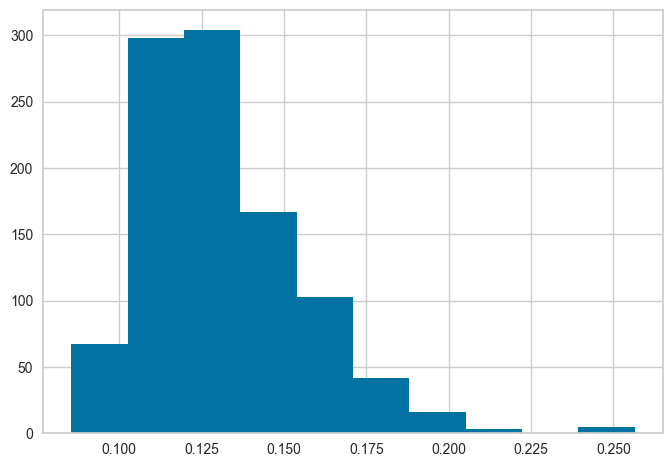

In [61]:
get_config('X_train')['pCFOS_N'].hist()

In [62]:
# check all the available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [63]:
# train iforest model
iforest = create_model('iforest')

In [64]:
iforest

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [65]:
# train iforest with specific model parameter
create_model('iforest', contamination = 0.1)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [66]:
iforest_results = assign_model(iforest)
iforest_results

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Anomaly,Anomaly_Score
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m,0,-0.017026
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m,0,-0.016855
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622058,0.209011,0.175722,2.283337,0.230247,...,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m,0,-0.017334
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m,0,-0.030236
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718678,0.213106,0.173627,2.134014,0.192158,...,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m,0,-0.032110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s,0,-0.017536
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s,0,-0.016750
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s,1,0.006638
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s,0,-0.003664


In [67]:
# tsne plot of anomalies
plot_model(iforest, plot = 'tsne')

In [68]:
# save model
save_model(iforest, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['DYRK1A_N', 'ITSN1_N', 'BDNF_N',
                                              'NR1_N', 'NR2A_N', 'pAKT_N',
                                              'pBRAF_N', 'pCAMKII_N', 'pCREB_N',
                                              'pELK_N', 'pERK_N', 'pJNK_N',
                                              'PKCA_N', 'pMEK_N', 'pNR1_N',
                                              'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
                                              'pRSK_N', 'AKT_N', 'BRAF_N',
                                              'CAMKII_N', 'CREB_N', 'ELK_N',
                                              'ERK_N', 'GSK3B_N', 'JNK_N',
                                              'ME...
                                                                     'class'],
                                                               handle_missing='return_nan',
   

In [69]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/rx/lm_kfng95w9_1rxj88cthphm0000gq/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['DYRK1A_N', 'ITSN1_N', 'BDNF_N',
                                             'NR1_N', 'NR2A_N', 'pAKT_N',
                                             'pBRAF_N', 'pCAMKII_N', 'pCREB_N',
                                             'pELK_N', 'pERK_N', 'pJNK_N',
                                             'PKCA_N', 'pMEK_N', 'pNR1_N',
                                             'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
                                             'pRSK_N', 'AKT_N', 'BRAF_N',
                                             'C...
                                                                    'class'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('bin_numeric_features',
                 TransformerWrapper(include=['pCFOS_N'],
                                    transformer=KBinsDiscretizer(encode='ordinal',
                                                                 strategy='kmeans'))),
                ('trained_model',
                 IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0))])

In [70]:
# save experiment
save_experiment('my_experiment')

In [71]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Original data shape,"(1080, 82)"
2,Transformed data shape,"(1080, 1168)"
3,Numeric features,77
4,Categorical features,5
5,Rows with missing values,48.9%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode
